In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [5]:
mu_a, sigma_a = 300, 15
mu_b, sigma_b = 280, 15

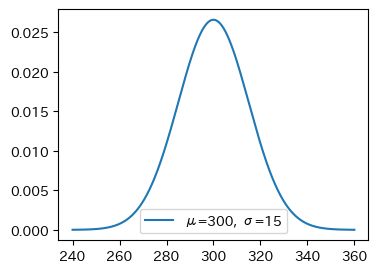

In [39]:
plt.figure(figsize=(4, 3))
x = np.linspace(mu_a-sigma_a*4, mu_a+sigma_a*4, 1000)
y = stats.norm.pdf(x, loc=mu_a, scale=sigma_a)
plt.plot(x, y, label=f'μ={mu_a}, σ={sigma_a}')
plt.legend()
plt.show()

In [77]:
x = 310
z = (x - mu_a) / sigma_a
print(f'{x}g 以上になる確率: {1 - stats.norm.cdf(z):.04f}')

310g 以上になる確率: 0.2525


In [72]:
mu_ab = mu_a / 4 + mu_b * 3 / 4
print(mu_ab)

285.0


In [73]:
sigma_ab = np.sqrt(np.power(1/4, 2) * np.power(sigma_a, 2) + np.power(3/4, 2) * np.power(sigma_b, 2))
print(sigma_ab)

11.858541225631422


In [76]:
x = 310
z = (x - mu_ab) / sigma_ab
print(f'{x}g 以上になる確率: {1 - stats.norm.cdf(z):.04f}')

310g 以上になる確率: 0.0175


- 条件
    - a の玉ねぎの割合 : 0.2
    - b の玉ねぎの割合 : 0.8
    - a の玉ねぎで 310g 超の玉ねぎである確率 : 0.2525
    - b の玉ねぎで 310g 超の玉ねぎである確率 : 0.0228
- $a \cap 310$ である確率: 0.2 x 0.2525
- $b \cap 310$ である確率: 0.8 x 0.0228
- $a \cap 309$ である確率: 1 - 0.2 x 0.2525
- $b \cap 309$ である確率: 1 - 0.8 x 0.0228

| |aをとる確率|bをとる確率|
|:--:|:--:|:--:|
|310超|0.2 x 0.2525| 0.8 x 0.0228|
|310以下|1- (0.2 x 0.2525)| 1- (0.8 x 0.0228)|

In [102]:
p_a, p_b = 0.2, 0.8

x = 310
z_a = (x - mu_a) / sigma_a
z_b = (x - mu_b) / sigma_b
p_a_310 = 1 - stats.norm.cdf(z_a)
p_b_310 = 1 - stats.norm.cdf(z_b)

acap310 = p_a * p_a_310
bcap310 = p_b * p_b_310

pd.DataFrame(
    [[acap310, bcap310], [p_a - acap310, p_b - bcap310]],
    columns=['A', 'B'],
    index=['310超', '310以下']
)

,A,B
310超,0.050499,0.0182
310以下,0.149501,0.7818
